In [1]:
import xarray as xr
import matplotlib.pyplot as plt

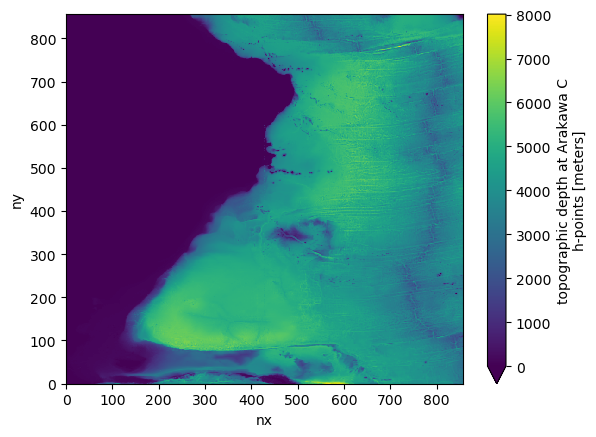

In [2]:
topo=xr.open_dataset('~/SWA14/gridgen/outputs_edited/ocean_topog.nc')
Omask=xr.open_dataset('~/SWA14/gridgen/outputs_edited/ocean_mask.nc')
Lmask=xr.open_dataset('~/SWA14/gridgen/outputs_edited/land_mask.nc')
topo.depth.plot(vmin=0)

In [3]:
#https://github.com/raphaeldussin/om4labs/blob/b62fb4ca85516997911f024b236087b61d65a039/om4labs/m6toolbox.py#L173
def ice9(i, j, source, xcyclic=True, tripolar=True):
    """
    An iterative (stack based) implementation of "Ice 9".
    The flood fill starts at [j,i] and treats any positive value of "source" as
    passable. Zero and negative values block flooding.
    xcyclic = True allows cyclic behavior in the last index. (default)
    tripolar = True allows a fold across the top-most edge. (default)
    Returns an array of 0's and 1's.
    """
    wetMask = 0 * source
    (nj, ni) = wetMask.shape
    stack = set()
    stack.add((j, i))
    while stack:
        (j, i) = stack.pop()
        if wetMask[j, i] or source[j, i] <= 0:
            continue
        wetMask[j, i] = 1
        if i > 0:
            stack.add((j, i - 1))
        elif xcyclic:
            stack.add((j, ni - 1))
        if i < ni - 1:
            stack.add((j, i + 1))
        elif xcyclic:
            stack.add((j, 0))
        if j > 0:
            stack.add((j - 1, i))
        if j < nj - 1:
            stack.add((j + 1, i))
        elif tripolar:
            stack.add((j, ni - 1 - i))  # Tri-polar fold
    return wetMask

In [4]:
new_mask=ice9(232,312,Omask.mask.data,False,False)

In [5]:
newOmask=xr.Dataset()
newLmask=xr.Dataset()
newOmask['mask']=xr.DataArray(new_mask, coords=Omask.coords)
newLmask['mask']=xr.DataArray(new_mask, coords=Omask.coords)
print(newOmask)
newtopo= topo.copy()

<xarray.Dataset>
Dimensions:  (ny: 857, nx: 857)
Dimensions without coordinates: ny, nx
Data variables:
    mask     (ny, nx) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1


In [6]:
#Corrections

#Corrections

newLmask['mask']=newLmask.mask.where(newOmask.mask==0.0,1.0,0.0)


newtopo.depth.loc[dict(nx=104,ny=217)]=18
newtopo.depth.loc[dict(nx=399,ny=477)]=14.375
newtopo.depth.loc[dict(nx=244,ny=328)]=10.375
newtopo.depth.loc[dict(nx=245,ny=329)]=10.375
newtopo.depth.loc[dict(nx=171,ny=271)]=8.375
newtopo.depth.loc[dict(nx=171,ny=271)]=8.375
newtopo.depth.loc[dict(nx=111,ny=186)]=67.9375
newtopo.depth.loc[dict(nx=113,ny=217)]=27.6875
newtopo.depth.loc[dict(nx=56 ,ny=165)]=17
newtopo.depth.loc[dict(nx=300,ny=776)]=5


newtopo.depth.loc[dict(nx=306,ny=776)]=-5
newOmask.mask.loc[dict(nx=306,ny=776)]=0.0
newLmask.mask.loc[dict(nx=306,ny=776)]=1.0

newtopo.depth.loc[dict(nx=313,ny=774)]=-5
newOmask.mask.loc[dict(nx=313,ny=774)]=0.0
newLmask.mask.loc[dict(nx=313,ny=774)]=1.0

newtopo.depth.loc[dict(nx=382,ny=745)]=-5
newOmask.mask.loc[dict(nx=382,ny=745)]=0.0
newLmask.mask.loc[dict(nx=382,ny=745)]=1.0

newtopo.depth.loc[dict(nx=405,ny=744)]=-5
newOmask.mask.loc[dict(nx=405,ny=744)]=0.0
newLmask.mask.loc[dict(nx=405,ny=744)]=1.0

newtopo.depth.loc[dict(nx=412,ny=744)]=-5
newOmask.mask.loc[dict(nx=412,ny=744)]=0.0
newLmask.mask.loc[dict(nx=412,ny=744)]=1.0

newtopo.depth.loc[dict(nx=336,ny=765)]=-5
newOmask.mask.loc[dict(nx=336,ny=765)]=0.0
newLmask.mask.loc[dict(nx=336,ny=765)]=1.0

newtopo.depth.loc[dict(nx=344,ny=764)]=8
newtopo.depth.loc[dict(nx=345,ny=763)]=8

newtopo.depth.loc[dict(nx=321,ny=442)]=-8
newOmask.mask.loc[dict(nx=321,ny=442)]=0.0 #make land point
newLmask.mask.loc[dict(nx=321,ny=442)]=1.0

newOmask.mask.loc[dict(nx=418,ny=514)]=1.0 #make ocean point
newLmask.mask.loc[dict(nx=418,ny=514)]=0.0

newtopo.depth.loc[dict(nx=425,ny=532)]=5
newOmask.mask.loc[dict(nx=425,ny=532)]=1.0 #make ocean point
newLmask.mask.loc[dict(nx=425,ny=532)]=0.0

newtopo.depth.loc[dict(nx=487,ny=675)]=-8
newOmask.mask.loc[dict(nx=487,ny=675)]=0.0 #make land point
newLmask.mask.loc[dict(nx=487,ny=675)]=1.0

newtopo.depth.loc[dict(nx=291,ny=411)]=8

newtopo.depth.loc[dict(nx=296,ny=423)]=-8
newOmask.mask.loc[dict(nx=296,ny=423)]=0.0
newLmask.mask.loc[dict(nx=296,ny=423)]=1.0
newtopo.depth.loc[dict(nx=296,ny=421)]=5
newtopo.depth.loc[dict(nx=305,ny=431)]=5

newtopo.depth.loc[dict(nx=460,ny=712)]=-8
newOmask.mask.loc[dict(nx=460,ny=712)]=0.0
newLmask.mask.loc[dict(nx=460,ny=712)]=1.0

newtopo.depth.loc[dict(nx=461,ny=712)]=-8
newOmask.mask.loc[dict(nx=461,ny=712)]=0.0
newLmask.mask.loc[dict(nx=461,ny=712)]=1.0

newtopo.depth.loc[dict(nx=430,ny=594)]=70.0

newtopo.depth.loc[dict(nx=468,ny=639)]=5
newtopo.depth.loc[dict(nx=265,ny=348)]=5

newtopo.depth.loc[dict(nx=271,ny=361)]=8
newtopo.depth.loc[dict(nx=98,ny=219)]=5
newtopo.depth.loc[dict(nx=98,ny=218)]=6

newtopo.depth.loc[dict(nx=99,ny=226)]=5
newOmask.mask.loc[dict(nx=99,ny=226)]=1.0
newLmask.mask.loc[dict(nx=99,ny=226)]=0.0

newtopo.depth.loc[dict(nx=101,ny=225)]=5
newOmask.mask.loc[dict(nx=101,ny=225)]=1.0
newLmask.mask.loc[dict(nx=101,ny=225)]=0.0

newtopo.depth.loc[dict(nx=367,ny=460)]=-8
newOmask.mask.loc[dict(nx=367,ny=460)]=0.0
newLmask.mask.loc[dict(nx=367,ny=460)]=1.0

newtopo.depth.loc[dict(nx=369,ny=460)]=-8
newOmask.mask.loc[dict(nx=369,ny=460)]=0.0
newLmask.mask.loc[dict(nx=369,ny=460)]=1.0

newtopo.depth.loc[dict(nx=359,ny=457)]=-8
newOmask.mask.loc[dict(nx=359,ny=457)]=0.0
newLmask.mask.loc[dict(nx=359,ny=457)]=1.0

newtopo.depth.loc[dict(nx=365,ny=456)]=-8
newOmask.mask.loc[dict(nx=365,ny=456)]=0.0
newLmask.mask.loc[dict(nx=365,ny=456)]=1.0

newtopo.depth.loc[dict(nx=347,ny=451)]=-8
newOmask.mask.loc[dict(nx=347,ny=451)]=0.0
newLmask.mask.loc[dict(nx=347,ny=451)]=1.0

newtopo.depth.loc[dict(nx=71,ny=176)]=-8
newOmask.mask.loc[dict(nx=71,ny=176)]=0.0
newLmask.mask.loc[dict(nx=71,ny=176)]=1.0

newtopo.depth.loc[dict(nx=66,ny=181)]=8
newOmask.mask.loc[dict(nx=66,ny=181)]=1.0
newLmask.mask.loc[dict(nx=66,ny=181)]=0.0

newtopo.depth.loc[dict(nx=66,ny=171)]=30
newOmask.mask.loc[dict(nx=66,ny=171)]=1.0
newLmask.mask.loc[dict(nx=66,ny=171)]=0.0

newOmask.mask.loc[dict(nx=slice(228,230),ny=slice(308,315))]=0
newOmask.mask.loc[dict(nx=slice(230,231),ny=slice(309,315))]=0
newOmask.mask.loc[dict(nx=slice(231,232),ny=slice(310,315))]=0
newOmask.mask.loc[dict(nx=slice(232,233),ny=slice(311,315))]=0
newOmask.mask.loc[dict(nx=slice(233,234),ny=slice(312,315))]=0
newLmask.mask.loc[dict(nx=slice(228,230),ny=slice(308,315))]=0
newLmask.mask.loc[dict(nx=slice(230,231),ny=slice(309,315))]=0
newLmask.mask.loc[dict(nx=slice(231,232),ny=slice(310,315))]=0
newLmask.mask.loc[dict(nx=slice(232,233),ny=slice(311,315))]=0
newLmask.mask.loc[dict(nx=slice(233,234),ny=slice(312,315))]=0
newtopo.depth.loc[dict(nx=slice(228,230),ny=slice(308,315))]=-8
newtopo.depth.loc[dict(nx=slice(230,231),ny=slice(309,315))]=-8
newtopo.depth.loc[dict(nx=slice(231,232),ny=slice(310,315))]=-8
newtopo.depth.loc[dict(nx=slice(232,233),ny=slice(311,315))]=-8
newtopo.depth.loc[dict(nx=slice(233,234),ny=slice(312,315))]=-8

newtopo.depth.loc[dict(nx=39,ny=96)]=6.785

newtopo.depth.loc[dict(nx=9,ny=27)]=-8
newOmask.mask.loc[dict(nx=9,ny=27)]=0.0
newLmask.mask.loc[dict(nx=9,ny=27)]=1.0

newtopo.depth.loc[dict(nx=10,ny=26)]=5
newOmask.mask.loc[dict(nx=10,ny=26)]=1.0
newLmask.mask.loc[dict(nx=10,ny=26)]=0.0

newtopo.depth.loc[dict(nx=10,ny=27)]=8
newOmask.mask.loc[dict(nx=10,ny=27)]=1.0
newLmask.mask.loc[dict(nx=10,ny=27)]

newtopo.depth.loc[dict(nx=10,ny=28)]=10
newOmask.mask.loc[dict(nx=10,ny=28)]=1.0
newLmask.mask.loc[dict(nx=10,ny=28)]=0.0

newtopo.depth.loc[dict(nx=36,ny=7)]=-8
newOmask.mask.loc[dict(nx=36,ny=7)]=0.0
newLmask.mask.loc[dict(nx=36,ny=7)]=1.0

newtopo.depth.loc[dict(nx=5,ny=41)]=-8
newOmask.mask.loc[dict(nx=5,ny=41)]=0.0
newLmask.mask.loc[dict(nx=5,ny=41)]=1.0

newtopo.depth.loc[dict(nx=3,ny=34)]=8.735

newtopo.depth.loc[dict(nx=134,ny=38)]=-8
newOmask.mask.loc[dict(nx=134,ny=38)]=0.0
newLmask.mask.loc[dict(nx=134,ny=38)]=1.0

newtopo.depth.loc[dict(nx=144,ny=39)]=8
newtopo.depth.loc[dict(nx=113,ny=41)]=11.375
newtopo.depth.loc[dict(nx=131,ny=42)]=5

newtopo.depth.loc[dict(nx=131,ny=44)]=5
newOmask.mask.loc[dict(nx=131,ny=44)]=1.0
newLmask.mask.loc[dict(nx=131,ny=44)]=0.0

newtopo.depth.loc[dict(nx=150,ny=43)]=6.235

newtopo.depth.loc[dict(nx=119,ny=44)]=-8
newOmask.mask.loc[dict(nx=119,ny=44)]=0.0
newLmask.mask.loc[dict(nx=119,ny=44)]=1.0

newtopo.depth.loc[dict(nx=119,ny=47)]=-8
newOmask.mask.loc[dict(nx=119,ny=44)]=0.0
newLmask.mask.loc[dict(nx=119,ny=44)]=1.0

newtopo.depth.loc[dict(nx=118,ny=50)]=-8
newOmask.mask.loc[dict(nx=118,ny=50)]=0.0
newLmask.mask.loc[dict(nx=118,ny=50)]=1.0

newtopo.depth.loc[dict(nx=153,ny=44)]=12.375

newtopo.depth.loc[dict(nx=149,ny=52)]=15
newOmask.mask.loc[dict(nx=149,ny=52)]=1.0
newLmask.mask.loc[dict(nx=149,ny=52)]=0.0

newtopo.depth.loc[dict(nx=148,ny=52)]=10

newtopo.depth.loc[dict(nx=117,ny=49)]=10

newtopo.depth.loc[dict(nx=139,ny=48)]=13

newtopo.depth.loc[dict(nx=136,ny=45)]=8.735

newtopo.depth.loc[dict(nx=118,ny=45)]=9.875

newtopo.depth.loc[dict(nx=1,ny=47)]=-8
newOmask.mask.loc[dict(nx=1,ny=47)]=0.0
newLmask.mask.loc[dict(nx=1,ny=47)]=1.0

newtopo.depth.loc[dict(nx=8,ny=26)]=8
newtopo.depth.loc[dict(nx=7,ny=25)]=8
newtopo.depth.loc[dict(nx=7,ny=24)]=5
newtopo.depth.loc[dict(nx=34,ny=8)]=7

newtopo.depth.loc[dict(nx=42,ny=141)]=5
newtopo.depth.loc[dict(nx=43,ny=141)]=7

newtopo.depth.loc[dict(nx=23,ny=132)]=12

newtopo.depth.loc[dict(nx=118,ny=228)]=12
newtopo.depth.loc[dict(nx=117,ny=228)]=6

newtopo.depth.loc[dict(nx=98,ny=214)]=6
newtopo.depth.loc[dict(nx=97,ny=214)]=7

newtopo.depth.loc[dict(nx=67,ny=182)]=17.375

newtopo.depth.loc[dict(nx=63,ny=179)]=6
newtopo.depth.loc[dict(nx=59,ny=168)]=6
newtopo.depth.loc[dict(nx=394,ny=468)]=12

#Careful!
for x in range(100-7,100+8):
    for y in range(224-7,224+8):
        if newOmask.mask.loc[dict(nx=x,ny=y)] == 1.0:
            newtopo.depth.loc[dict(nx=x,ny=y)]=newtopo.depth.loc[dict(nx=x,ny=y)]+3
newtopo.depth.loc[dict(nx=142,ny=52)]=16
newtopo.depth.loc[dict(nx=1,ny=47)]=-8
newOmask.mask.loc[dict(nx=1,ny=47)]=0.0
newLmask.mask.loc[dict(nx=1,ny=47)]=1.0
newtopo.depth.loc[dict(nx=98,ny=213)]=6
newtopo.depth.loc[dict(nx=99,ny=211)]=4
newtopo.depth.loc[dict(nx=98,ny=211)]=5
newtopo.depth.loc[dict(nx=76,ny=181)]=5

newtopo.depth.loc[dict(nx=68,ny=182)]=5
newOmask.mask.loc[dict(nx=68,ny=182)]=1.0
newLmask.mask.loc[dict(nx=68,ny=182)]=0.0

newtopo.depth.loc[dict(nx=385,ny=460)]=5
newOmask.mask.loc[dict(nx=385,ny=460)]=1.0
newLmask.mask.loc[dict(nx=385,ny=460)]=0.0

newtopo.depth.loc[dict(nx=385,ny=459)]=7
newOmask.mask.loc[dict(nx=385,ny=459)]=1.0
newLmask.mask.loc[dict(nx=385,ny=459)]=0.0

newtopo.depth.loc[dict(nx=342,ny=450)]=6

newtopo.depth.loc[dict(nx=337,ny=447)]=-8
newOmask.mask.loc[dict(nx=337,ny=447)]=0.0
newLmask.mask.loc[dict(nx=337,ny=447)]=1.0
newtopo.depth.loc[dict(nx=338,ny=447)]=-8
newOmask.mask.loc[dict(nx=338,ny=447)]=0.0
newLmask.mask.loc[dict(nx=338,ny=447)]=1.0

newtopo.depth.loc[dict(nx=467,ny=638)]=8
newtopo.depth.loc[dict(nx=463,ny=634)]=8

newtopo.depth.loc[dict(nx=429,ny=593)]=60
newtopo.depth.loc[dict(nx=428,ny=593)]=600

newtopo.depth.loc[dict(nx=451,ny=718)]=6
newtopo.depth.loc[dict(nx=452,ny=717)]=12
newtopo.depth.loc[dict(nx=465,ny=713)]=6
newtopo.depth.loc[dict(nx=466,ny=713)]=8
newtopo.depth.loc[dict(nx=485,ny=664)]=6

newtopo.depth.loc[dict(nx=481,ny=654)]=6
newtopo.depth.loc[dict(nx=425,ny=533)]=6

newtopo.depth.loc[dict(nx=417,ny=514)]=12
newtopo.depth.loc[dict(nx=417,ny=513)]=8
newtopo.depth.loc[dict(nx=417,ny=512)]=6

newtopo.depth.loc[dict(nx=320,ny=441)]=5
newtopo.depth.loc[dict(nx=330,ny=769)]=6
newtopo.depth.loc[dict(nx=331,ny=769)]=12

newtopo.depth.loc[dict(nx=333,ny=768)]=6
newtopo.depth.loc[dict(nx=333,ny=767)]=7
newtopo.depth.loc[dict(nx=335,ny=766)]=5
newtopo.depth.loc[dict(nx=342,ny=766)]=8

newtopo.depth.loc[dict(nx=344,ny=762)]=-8
newOmask.mask.loc[dict(nx=344,ny=762)]=0.0
newLmask.mask.loc[dict(nx=344,ny=762)]=1.0
newtopo.depth.loc[dict(nx=347,ny=762)]=5
newtopo.depth.loc[dict(nx=348,ny=762)]=6
newtopo.depth.loc[dict(nx=351,ny=748)]=8

newtopo.depth.loc[dict(nx=386,ny=746)]=8

newtopo.depth.loc[dict(nx=383,ny=746)]=6
newtopo.depth.loc[dict(nx=379,ny=746)]=5
newtopo.depth.loc[dict(nx=412,ny=745)]=5
newtopo.depth.loc[dict(nx=407,ny=745)]=5.5
newtopo.depth.loc[dict(nx=408,ny=745)]=5

newtopo.depth.loc[dict(nx=414,ny=744)]=5
newtopo.depth.loc[dict(nx=415,ny=744)]=6
newtopo.depth.loc[dict(nx=414,ny=745)]=6.36

newtopo.depth.loc[dict(nx=312,ny=775)]=6
newtopo.depth.loc[dict(nx=315,ny=774)]=5
               
newtopo.depth.loc[dict(nx=319,ny=772)]=-8
newOmask.mask.loc[dict(nx=319,ny=772)]=0.0
newLmask.mask.loc[dict(nx=319,ny=772)]=1.0

newtopo.depth.loc[dict(nx=320,ny=772)]=-8
newOmask.mask.loc[dict(nx=320,ny=772)]=0.0
newLmask.mask.loc[dict(nx=320,ny=772)]=1.0

newtopo.depth.loc[dict(nx=327,ny=769)]=-8
newOmask.mask.loc[dict(nx=327,ny=769)]=0.0
newLmask.mask.loc[dict(nx=327,ny=769)]=1.0 

newtopo.depth.loc[dict(nx=0,ny=50)]=7

newtopo.depth.loc[dict(nx=0,ny=47)]=-8
newOmask.mask.loc[dict(nx=0,ny=47)]=0.0
newLmask.mask.loc[dict(nx=0,ny=47)]=1.0

newtopo.depth.loc[dict(nx=2,ny=45)]=6
newtopo.depth.loc[dict(nx=3,ny=43)]=6
newtopo.depth.loc[dict(nx=68,ny=181)]=6

newtopo.depth.loc[dict(nx=385,ny=461)]=6
newtopo.depth.loc[dict(nx=385,ny=460)]=12
newtopo.depth.loc[dict(nx=384,ny=457)]=20

newtopo.depth.loc[dict(nx=424,ny=530)]=6
newtopo.depth.loc[dict(nx=329,ny=769)]=7
newtopo.depth.loc[dict(nx=328,ny=768)]=-8
newtopo.depth.loc[dict(nx=334,ny=767)]=8
newtopo.depth.loc[dict(nx=348,ny=760)]=8


newtopo.depth.loc[dict(nx=362,ny=750)]=8
newtopo.depth.loc[dict(nx=361,ny=752)]=16
newtopo.depth.loc[dict(nx=361,ny=751)]=7

newtopo.depth.loc[dict(nx=358,ny=749)]=5.5
newtopo.depth.loc[dict(nx=357,ny=748)]=5

newtopo.depth.loc[dict(nx=319,ny=773)]=5

for y in range(207,212):
    for x in range(45,67):
        newtopo.depth.loc[dict(nx=x,ny=y)]=-8
        newOmask.mask.loc[dict(nx=x,ny=y)]=0.0
        newLmask.mask.loc[dict(nx=x,ny=y)]=1.0
        
newtopo.depth.loc[dict(nx=55,ny=202)]=8
newOmask.mask.loc[dict(nx=55,ny=202)]=1.0
newLmask.mask.loc[dict(nx=55,ny=202)]=0.0    
newtopo.depth.loc[dict(nx=56,ny=202)]=8

In [7]:
# New Corrections
newtopo.depth.loc[dict(nx=262,ny=784)]=14
newOmask.mask.loc[dict(nx=262,ny=784)]=1.0
newLmask.mask.loc[dict(nx=262,ny=784)]=0.0

newtopo.depth.loc[dict(nx=261,ny=784)]=6
newOmask.mask.loc[dict(nx=261,ny=784)]=1.0
newLmask.mask.loc[dict(nx=261,ny=784)]=0.0

newtopo.depth.loc[dict(nx=265,ny=785)]=6
newtopo.depth.loc[dict(nx=265,ny=784)]=7
newOmask.mask.loc[dict(nx=265,ny=784)]=1.0
newLmask.mask.loc[dict(nx=265,ny=784)]=0.0

newtopo.depth.loc[dict(nx=254,ny=782)]=6
newOmask.mask.loc[dict(nx=254,ny=782)]=1.0
newLmask.mask.loc[dict(nx=254,ny=782)]=0.0

newtopo.depth.loc[dict(nx=253,ny=783)]=-8
newOmask.mask.loc[dict(nx=253,ny=783)]=0.0
newLmask.mask.loc[dict(nx=253,ny=783)]=1.0

newtopo.depth.loc[dict(nx=265,ny=786)]=-8
newOmask.mask.loc[dict(nx=265,ny=786)]=0.0
newLmask.mask.loc[dict(nx=265,ny=786)]=1.0

newtopo.depth.loc[dict(nx=265,ny=793)]=6
newOmask.mask.loc[dict(nx=265,ny=793)]=1.0
newLmask.mask.loc[dict(nx=265,ny=793)]=0.0

newtopo.depth.loc[dict(nx=267,ny=789)]=-8
newOmask.mask.loc[dict(nx=267,ny=789)]=0.0
newLmask.mask.loc[dict(nx=267,ny=789)]=1.0

newtopo.depth.loc[dict(nx=263,ny=815)]=8
newOmask.mask.loc[dict(nx=263,ny=815)]=1.0
newLmask.mask.loc[dict(nx=263,ny=815)]=0.0

newtopo.depth.loc[dict(nx=433,ny=600)]=6
newOmask.mask.loc[dict(nx=433,ny=600)]=1.0
newLmask.mask.loc[dict(nx=433,ny=600)]=0.0

newtopo.depth.loc[dict(nx=432,ny=599)]=6
newOmask.mask.loc[dict(nx=432,ny=599)]=1.0
newLmask.mask.loc[dict(nx=432,ny=599)]=0.0

newtopo.depth.loc[dict(nx=431,ny=601)]=-8
newOmask.mask.loc[dict(nx=431,ny=601)]=0.0
newLmask.mask.loc[dict(nx=431,ny=601)]=1.0

newtopo.depth.loc[dict(nx=432,ny=603)]=-8
newOmask.mask.loc[dict(nx=432,ny=603)]=0.0
newLmask.mask.loc[dict(nx=432,ny=603)]=1.0

newtopo.depth.loc[dict(nx=431,ny=599)]=-8
newOmask.mask.loc[dict(nx=431,ny=599)]=0.0
newLmask.mask.loc[dict(nx=431,ny=599)]=1.0

#New corrections 10-04-2023

for y in [267]:
    for x in range(170,174):
        #print(newtopo.depth.loc[dict(nx=x,ny=y)])
        newtopo.depth.loc[dict(nx=x,ny=y)]=8
        newOmask.mask.loc[dict(nx=x,ny=y)]=1.0
        newLmask.mask.loc[dict(nx=x,ny=y)]=0.0

newtopo.depth.loc[dict(nx=174,ny=266)]=8
newOmask.mask.loc[dict(nx=174,ny=266)]=1.0
newLmask.mask.loc[dict(nx=174,ny=266)]=0.0   

newtopo.depth.loc[dict(nx=172,ny=265)]=-8.0
newOmask.mask.loc[dict(nx=172,ny=265)]=0.0
newLmask.mask.loc[dict(nx=172,ny=265)]=1.0

# Plots  

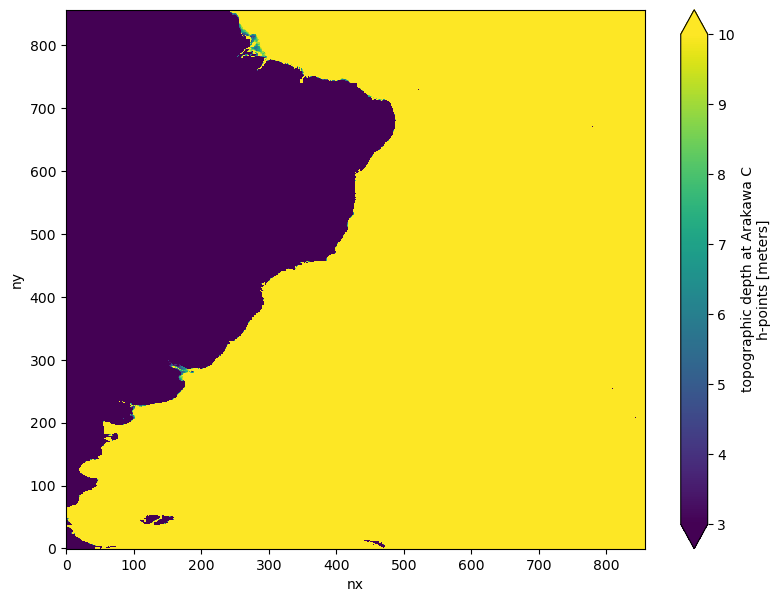

In [8]:
topo.depth.plot(vmin=3,vmax=10,size=7)

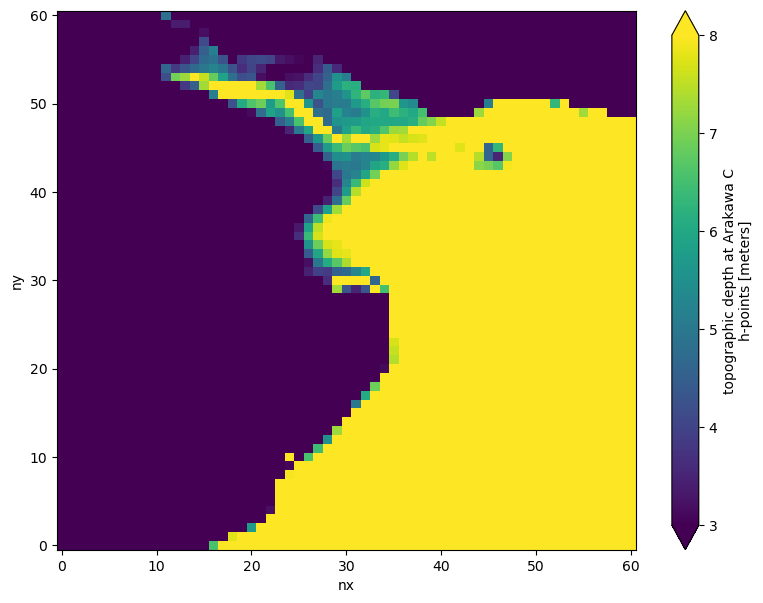

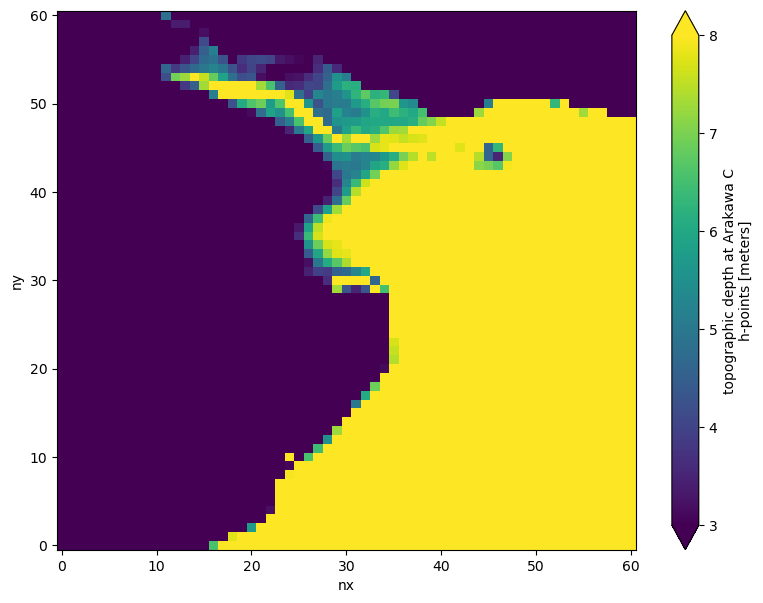

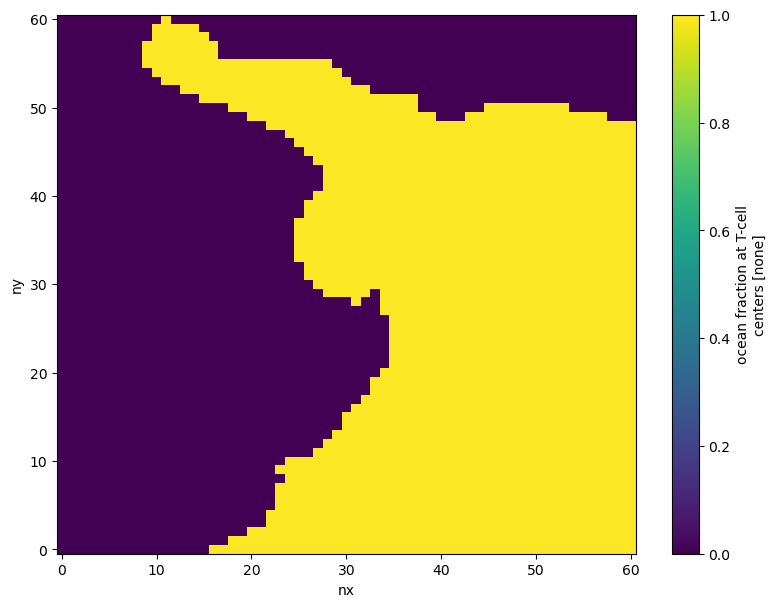

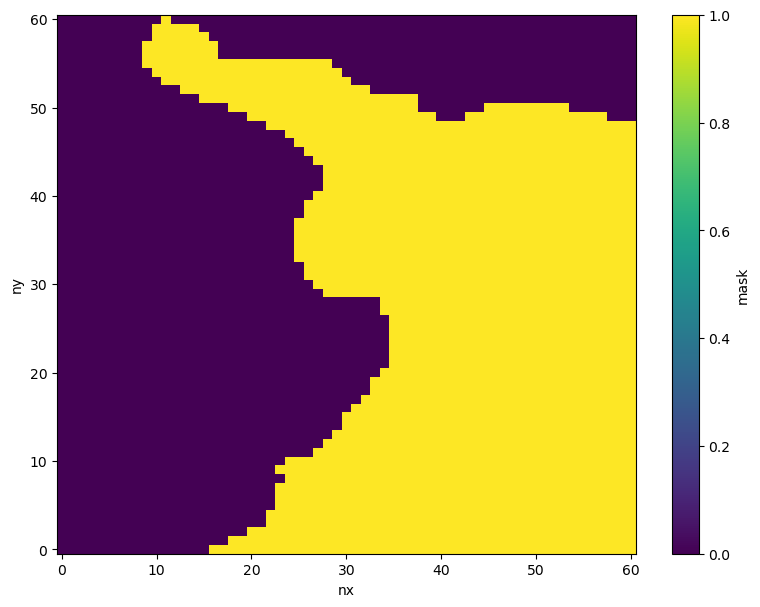

In [9]:
x = 171; y = 267
dx=30

topo.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
                            vmin=3,vmax=8,size=7)
newtopo.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
                            vmin=3,vmax=8,size=7)
Omask.mask.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(vmin=0,vmax=1,size=7)
newOmask.mask.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(vmin=0,vmax=1,size=7)


3806.6875
1
1
topo.depth.loc[dict(nx=365,ny=2)]
newOmask.mask.loc[dict(nx=365,ny=2)]
newLmask.mask.loc[dict(nx=365,ny=2)]


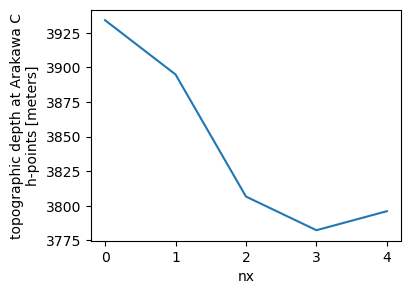

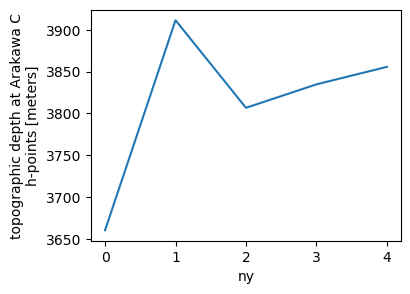

In [10]:
x = 365; y = 2
print(topo.depth.isel(nx=x,ny=y).data)
print(Omask.mask.isel(nx=x,ny=y).data)
print(newOmask.mask.isel(nx=x,ny=y).data)

print(f"topo.depth.loc[dict(nx={x},ny={y})]")
print(f"newOmask.mask.loc[dict(nx={x},ny={y})]")
print(f"newLmask.mask.loc[dict(nx={x},ny={y})]")

topo.depth.isel(nx=slice(x-2,x+3),ny=y).plot(size=3)
topo.depth.isel(nx=x,ny=slice(y-2,y+3)).plot(size=3)

In [11]:


# Flooding Southern Islands - much close to the boundaries
for y in range(0,20):
    for x in range(440,475):
        if topo.depth.loc[dict(nx=x,ny=y)] < 0.:  
            print(topo.depth.loc[dict(nx=x,ny=y)].values, 'to', #min(
                  topo.depth.loc[dict(nx=slice(x-1,x+1),ny=slice(0,20))].where(
                      topo.depth.loc[dict(nx=slice(x-1,x+1),ny=slice(0,20))]>0).min().values,
                  topo.depth.loc[dict(nx=slice(440,475),ny=slice(y-1,y+1))].where(
                      topo.depth.loc[dict(nx=slice(440,475),ny=slice(y-1,y+1))]>0).min().values) #)
            newtopo.depth.loc[dict(nx=x,ny=y)]=max(
                  topo.depth.loc[dict(nx=slice(x-1,x+1),ny=slice(0,20))].where(
                      topo.depth.loc[dict(nx=slice(x-1,x+1),ny=slice(0,20))]>0).min().values,
                  topo.depth.loc[dict(nx=slice(440,475),ny=slice(y-1,y+1))].where(
                      topo.depth.loc[dict(nx=slice(440,475),ny=slice(y-1,y+1))]>0).min().values)
            newOmask.mask.loc[dict(nx=x,ny=y)]=1.0
            newLmask.mask.loc[dict(nx=x,ny=y)]=0.0

-268.25 to 11.0625 10.5
-117.5625 to 5.0 10.5
-110.8125 to 61.0625 10.5
-444.3125 to 11.0625 10.5
-351.6875 to 11.0625 10.5
-291.9375 to 5.0 10.5
-360.125 to 5.0 10.5
-85.0 to 5.625 10.5
-68.125 to 5.625 10.5
-143.25 to 15.125 10.5
-684.125 to 15.125 10.5
-859.0 to 11.0625 10.5
-1210.75 to 11.0625 10.5
-952.75 to 5.0 10.5
-309.5625 to 5.0 10.5
-79.1875 to 5.625 10.5
-47.625 to 15.125 10.5
-516.75 to 15.125 10.5
-917.875 to 15.125 10.5
-1093.875 to 11.0625 10.5
-1236.4375 to 11.0625 10.5
-805.375 to 5.0 10.5
-375.0 to 5.0 10.5
-84.0625 to 26.875 5.625
-428.875 to 15.125 5.625
-643.375 to 15.125 5.625
-830.25 to 15.125 5.625
-764.8125 to 11.0625 5.625
-327.4375 to 11.0625 5.625
-286.4375 to 5.0 5.625
-173.1875 to 5.0 5.625
-16.6875 to 41.1875 5.0
-45.5625 to 46.1875 5.0
-45.25 to 26.875 5.0
-551.8125 to 26.875 5.0
-765.875 to 15.125 5.0
-837.9375 to 15.125 5.0
-913.875 to 15.125 5.0
-456.6875 to 11.0625 5.0
-254.25 to 11.0625 5.0
-77.875 to 15.875 5.0
-424.75 to 15.875 5.0
-764.875 to 15

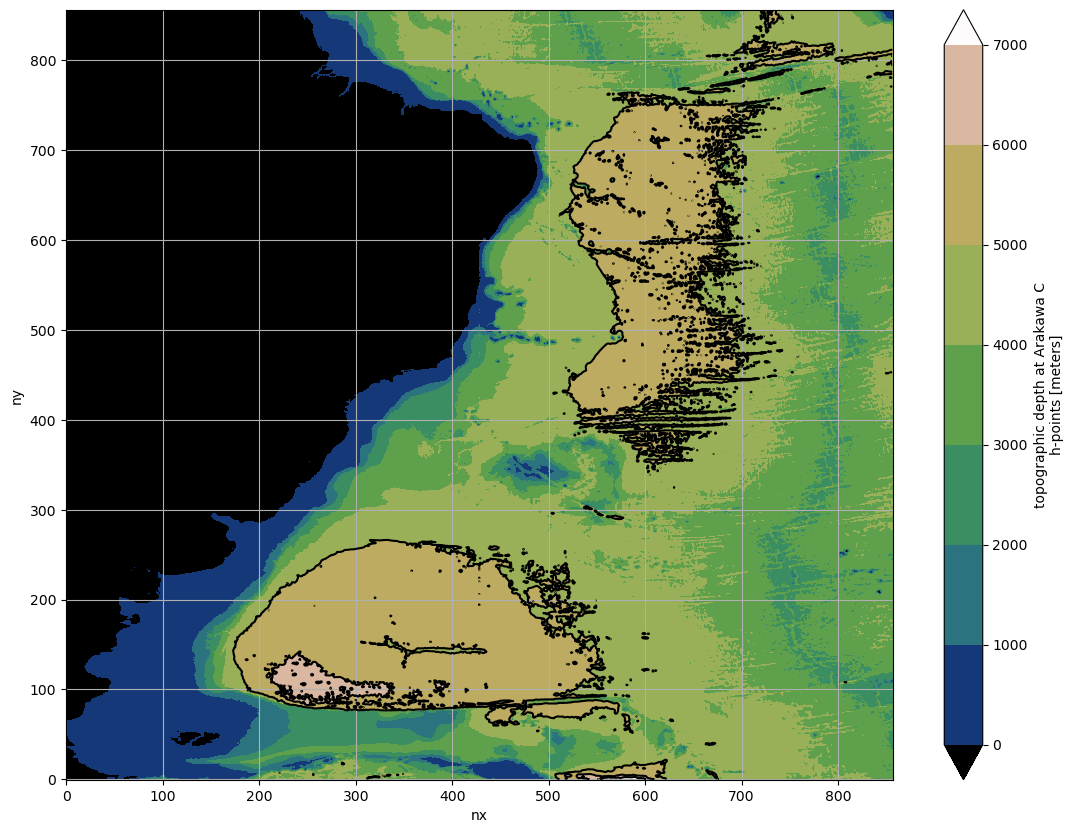

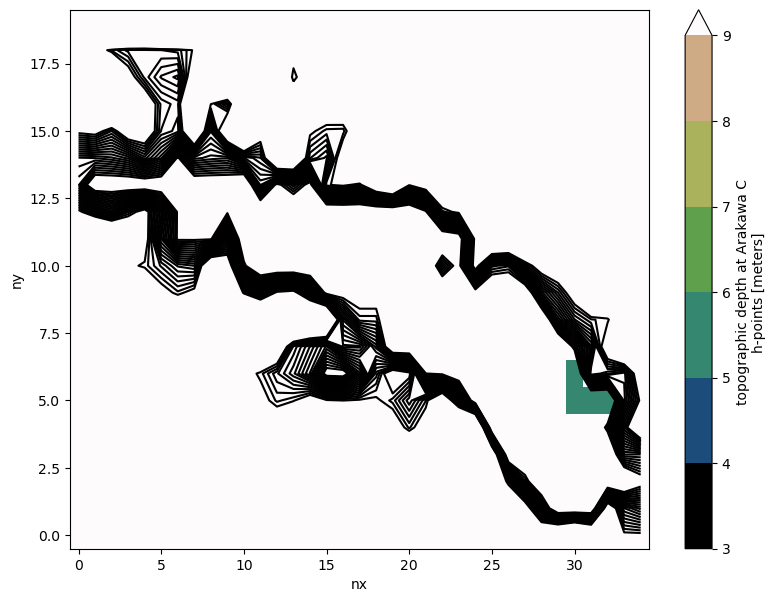

In [12]:
#plot topog.fixed
import matplotlib.pyplot as plt
import numpy as np
p=topo.depth.plot( size=10, cmap= 'gist_earth', levels=np.arange(0,8000,1000))
#p=topo.depth.isel(ny=slice(0,300),nx=slice(0,300)).plot(vmin=0,vmax=20, size=10)
plt.contour(topo.depth,colors='k',levels=np.arange(5000,8000,1000))
p.axes.grid()
plt.savefig('bathy_fixed.png')

topo.depth.isel(nx=slice(440,475),ny=slice(0,20)).plot(
    cmap= 'gist_earth', levels=np.arange(3,10,1), size=7)
plt.contour(topo.depth.isel(nx=slice(440,475),ny=slice(0,20))
                                  ,colors='k',levels=np.arange(50,150,5))

In [13]:
inputDir='./'

topog2=topo.assign_coords(ntiles=('ntiles',[1]))
topog2.to_netcdf(f'{inputDir}ocean_topog.nc', mode='w', format='NETCDF3_64BIT')
newLmask.to_netcdf(f'{inputDir}land_mask.nc', mode='w', format='NETCDF3_64BIT')
newOmask.to_netcdf(f'{inputDir}ocean_mask.nc', mode='w', format='NETCDF3_64BIT')

# Generate Mosaic Files for MOM6
In this step, the mosaic grids are generated. A hint is to link into a new directory to exploit before and after mask comparisons. The new dir must contain the ocean_hgrid.nc

In [15]:
from gridtools.gridutils import GridUtils
import sys, os, logging, cartopy

inputDir = "./bathy_edited/"

# Initialize a grid object
grd = GridUtils()
grd.openGrid(f"{inputDir}ocean_hgrid.nc", gridType='MOM6')
grd.readGrid()

# Write out FMS related support files
grd.makeSoloMosaic(
    topographyGrid=topo['depth'],
    writeLandmask=True,
    writeOceanmask=True,
    inputDirectory=inputDir,
    overwrite=True,
)
grd.saveGrid(filename=os.path.join(inputDir, "ocean_hgrid_final.nc"))



Successfully wrote netCDF file to ./bathy_edited/ocean_hgrid_final.nc


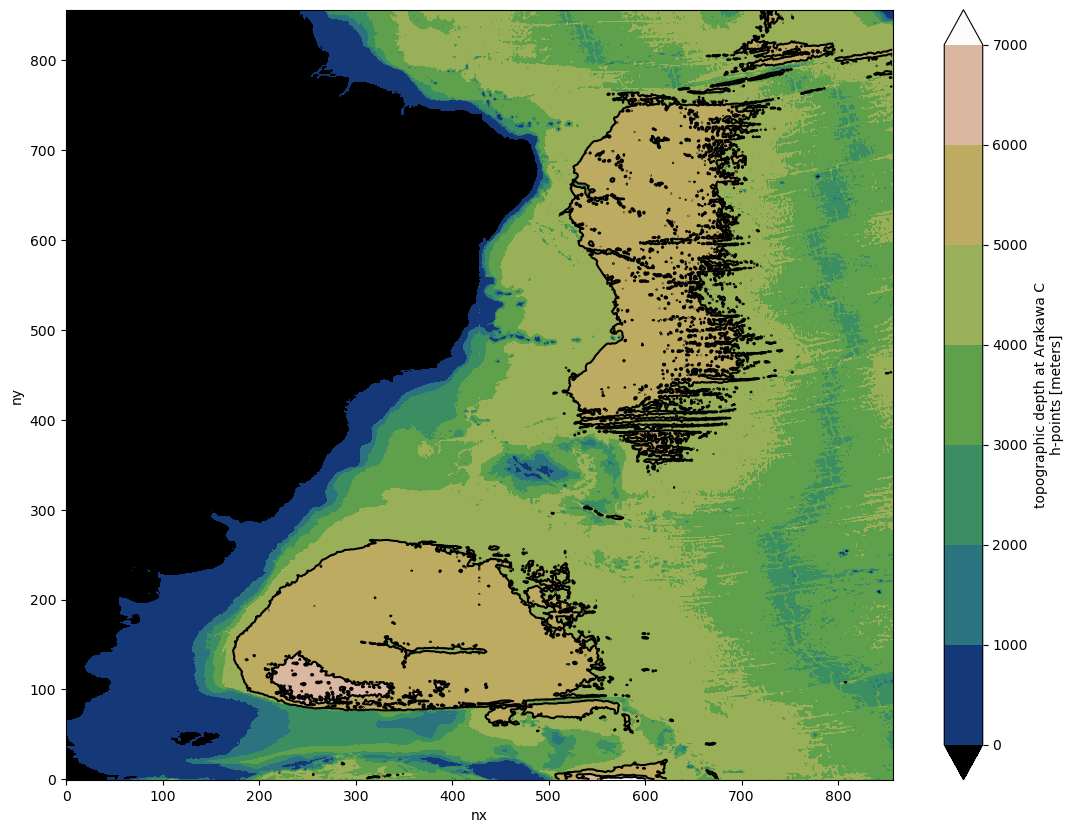

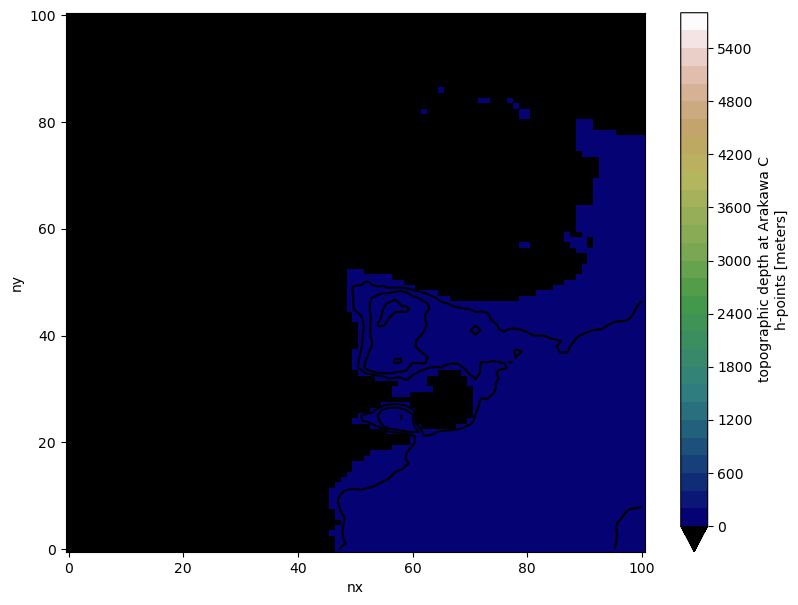

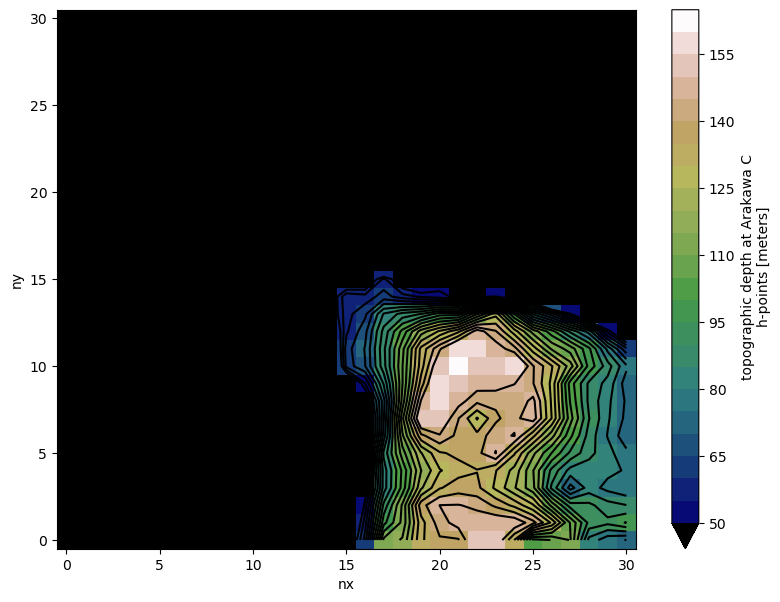

In [16]:
topo_check=xr.open_dataset('bathy_edited/ocean_topog.nc')
p=topo_check.depth.plot( size=10, cmap= 'gist_earth', levels=np.arange(0,8000,1000))
plt.contour(topo_check.depth,colors='k',levels=np.arange(5000,8000,1000))


x = 56; y = 200
dx=50
topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
    cmap= 'gist_earth', levels=np.arange(0,6000,200), size=7)
plt.contour(topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1))
                                  ,colors='k',levels=[50,100,150,200,600,1200,2400,3600,4800,5000])


dx=15
topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
    cmap= 'gist_earth', levels=np.arange(50,170,5), size=7)
plt.contour(topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1))
                                  ,colors='k',levels=np.arange(50,150,5))

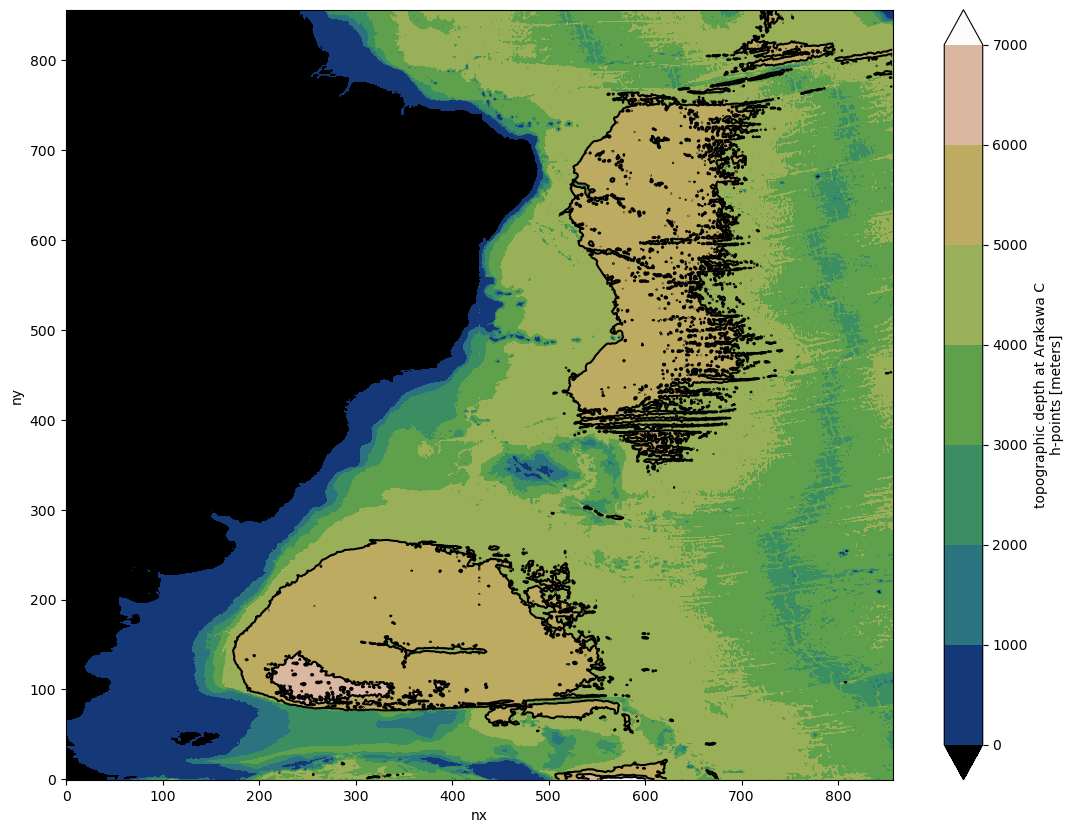

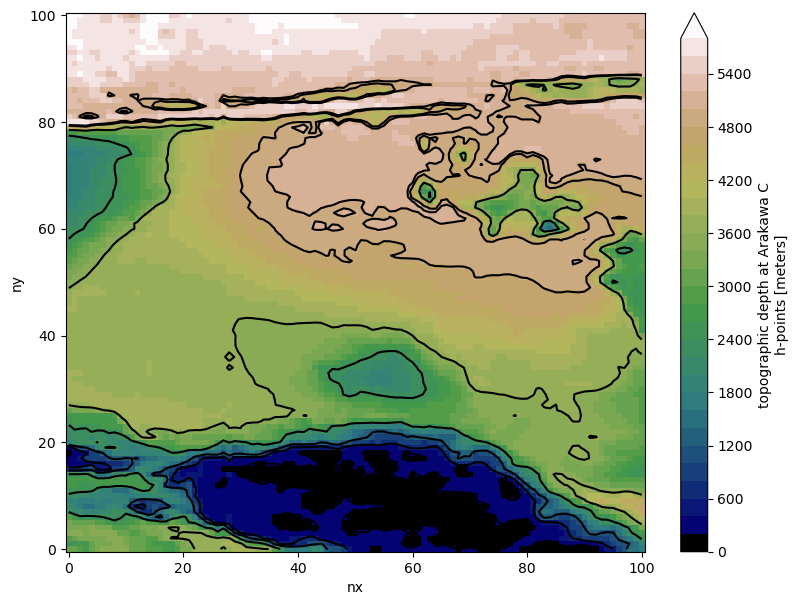

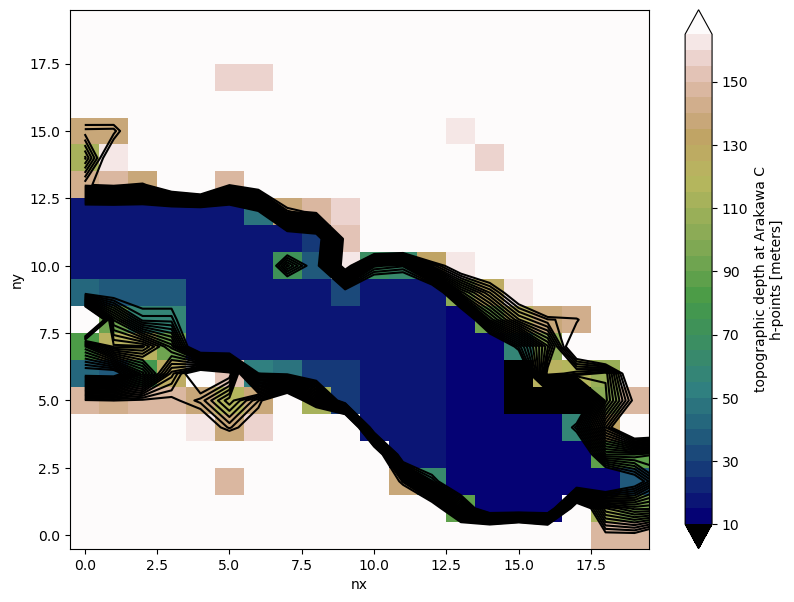

In [17]:
topo_check=xr.open_dataset('bathy_edited/ocean_topog.nc')
p=topo_check.depth.plot( size=10, cmap= 'gist_earth', levels=np.arange(0,8000,1000))
plt.contour(topo_check.depth,colors='k',levels=np.arange(5000,8000,1000))


x = 450; y = 50
dx=50
topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
    cmap= 'gist_earth', levels=np.arange(0,6000,200), size=7)
plt.contour(topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1))
                                  ,colors='k',levels=[50,100,150,200,600,1200,2400,3600,4800,5000])

x = 465; y = 10
dx=10
topo_check.depth.isel(nx=slice(455,475),ny=slice(0,20)).plot(
    cmap= 'gist_earth', levels=np.arange(10,170,5), size=7)
plt.contour(topo_check.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1))
                                  ,colors='k',levels=np.arange(50,150,5))

In [17]:
print(topo_check.depth.isel(nx=283,ny=783))
topo_check.depth.isel(nx=55,ny=199)

<xarray.DataArray 'depth' ()>
array(5.6875)
Attributes:
    units:          meters
    standard_name:  topographic depth at Arakawa C h-points
    sha256:         d2feaa1b2cd424122120448793e4ebe17df8e5035521ba0a3795ec18f...


<xarray.DataArray 'depth' ()>
array(40.125)
Attributes:
    units:          meters
    standard_name:  topographic depth at Arakawa C h-points
    sha256:         d2feaa1b2cd424122120448793e4ebe17df8e5035521ba0a3795ec18f...